# predicting bike prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Read dataset

I'll read the dataset and get information about it.

In [2]:
dataset = pd.read_csv('BIKE DETAILS.csv')

In [3]:
dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
dataset = pd.DataFrame(dataset,columns=['name','year','seller_type	owner','km_driven','ex_showroom_price','selling_price'])

In [5]:
dataset.head(5)

,name,year,seller_type\towner,km_driven,ex_showroom_price,selling_price
0,Royal Enfield Classic 350,2019,NaN,350,NaN,175000
1,Honda Dio,2017,NaN,5650,NaN,45000
2,Royal Enfield Classic Gunmetal Grey,2018,NaN,12000,148114.0,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,NaN,23000,89643.0,65000
4,Yamaha SZ [2013-2014],2011,NaN,21000,NaN,20000


In [6]:
dataset.shape

(1061, 6)

In [7]:
dataset.describe()

,year,seller_type\towner,km_driven,ex_showroom_price,selling_price
count,1061.000000,0.0,1061.000000,6.260000e+02,1061.000000
mean,2013.867107,NaN,34359.833176,8.795871e+04,59638.151744
std,4.301191,NaN,51623.152702,7.749659e+04,56304.291973
min,1988.000000,NaN,350.000000,3.049000e+04,5000.000000
25%,2011.000000,NaN,13500.000000,5.485200e+04,28000.000000
50%,2015.000000,NaN,25000.000000,7.275250e+04,45000.000000
75%,2017.000000,NaN,43000.000000,8.703150e+04,70000.000000
max,2020.000000,NaN,880000.000000,1.278000e+06,760000.000000


In [8]:
dataset.iloc[:,-1]

0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64

In [9]:
dataset.iloc[:,:-1]

,name,year,seller_type\towner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,2019,NaN,350,NaN
1,Honda Dio,2017,NaN,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,2018,NaN,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,NaN,23000,89643.0
4,Yamaha SZ [2013-2014],2011,NaN,21000,NaN
...,...,...,...,...,...
1056,Activa 3g,2010,NaN,500000,52000.0
1057,Honda CB twister,2012,NaN,33000,51000.0
1058,Bajaj Discover 125,2013,NaN,35000,57000.0
1059,Honda CB Shine,2009,NaN,53000,58000.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 346 to 860
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               742 non-null    object 
 1   year               742 non-null    int64  
 2   seller_type	owner  0 non-null      float64
 3   km_driven          742 non-null    int64  
 4   ex_showroom_price  437 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.8+ KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

In [12]:
X_train.columns

Index(['name', 'year', 'seller_type\towner', 'km_driven', 'ex_showroom_price'], dtype='object')

### Name

Let's explore the various bikes in the dataset.

In [13]:
X_train["name"].value_counts()

Bajaj Pulsar 150                  34
Royal Enfield Classic 350         19
Honda Activa [2000-2015]          16
Honda CB Hornet 160R              15
Bajaj Pulsar 180                  15
                                  ..
TVS Jupiter                        1
Jawa Standard                      1
TVS Sport                          1
Hero Honda CD100SS                 1
Kawasaki Ninja 650 [2018-2019]     1
Name: name, Length: 242, dtype: int64

As it appears, there are several bikes in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a bikes also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [14]:
make_train = X_train["name"].str.split(" ", expand = True)
make_test = X_test["name"].str.split(" ", expand = True)

In [15]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

In [16]:
X_train

,name,year,seller_type\towner,km_driven,ex_showroom_price,Manufacturer
346,Hero Honda Splendor Plus,2010,NaN,35700,NaN,Hero
5,Honda CB Twister,2010,NaN,60000,53857.0,Honda
310,Yamaha Fazer Dlx,2012,NaN,40000,NaN,Yamaha
499,Bajaj Platina 100,2013,NaN,24000,NaN,Bajaj
104,Royal Enfield Classic Desert Storm,2017,NaN,16500,181445.0,Royal
...,...,...,...,...,...,...
330,Suzuki Access 125,2017,NaN,15000,NaN,Suzuki
466,Honda CB Unicorn 150,2017,NaN,12000,74295.0,Honda
121,UM Renegade Commando,2018,NaN,7000,180525.0,UM
1044,Bajaj Pulsar 150,2010,NaN,26000,75000.0,Bajaj


Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of bikes')

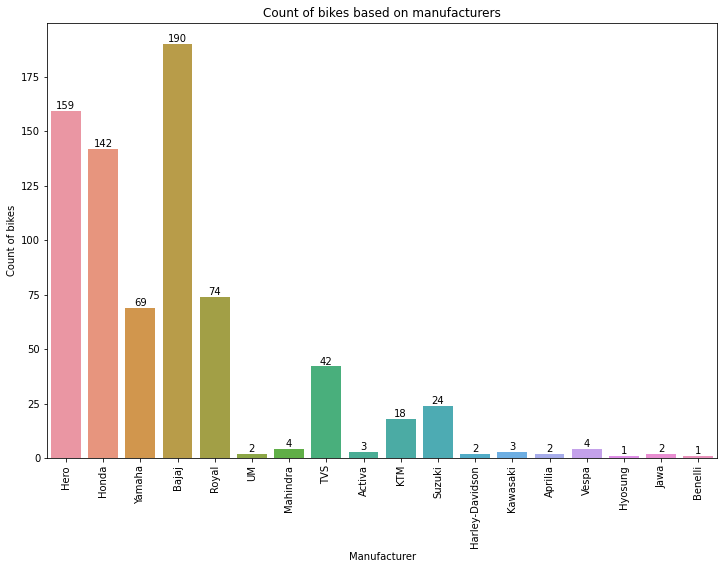

In [17]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of bikes based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of bikes")

Maximum cars in the dataset are by the manufacturer **Bajaj** and there are no null values.

I'll also drop the `name` column.

In [18]:
X_train.drop("name", axis = 1, inplace = True)
X_test.drop("name", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [19]:
curr_time = datetime.datetime.now()
X_train['year'] = X_train['year'].apply(lambda x : curr_time.year - x)
X_test['year'] = X_test['year'].apply(lambda x : curr_time.year - x)

# owner_type

All these columns are categorical columns which should be converted to dummy variables before being used.

### km_driven

`km_driven` is a numerical column with a certain range of values.

In [20]:
X_train

,year,seller_type\towner,km_driven,ex_showroom_price,Manufacturer
346,12,NaN,35700,NaN,Hero
5,12,NaN,60000,53857.0,Honda
310,10,NaN,40000,NaN,Yamaha
499,9,NaN,24000,NaN,Bajaj
104,5,NaN,16500,181445.0,Royal
...,...,...,...,...,...
330,5,NaN,15000,NaN,Suzuki
466,5,NaN,12000,74295.0,Honda
121,4,NaN,7000,180525.0,UM
1044,12,NaN,26000,75000.0,Bajaj


In [21]:
X_train["km_driven"]

346     35700
5       60000
310     40000
499     24000
104     16500
        ...  
330     15000
466     12000
121      7000
1044    26000
860     12000
Name: km_driven, Length: 742, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

In [22]:
## Mileage

#This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [23]:
print(sum(X_train["Manufacturer"].isnull()))
print(sum(X_test["Manufacturer"].isnull()))

0
0


In [24]:
X_train["ex_showroom_price"].fillna(X_train["ex_showroom_price"].astype("float64").mean(), inplace = True)
X_test["ex_showroom_price"].fillna(X_train["ex_showroom_price"].astype("float64").mean(), inplace = True)

In [25]:
print(sum(X_train["ex_showroom_price"].isnull()))
print(sum(X_test["ex_showroom_price"].isnull()))

0
0


## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [26]:
X_train = pd.get_dummies(X_train,
                         columns = ["year", "km_driven", "ex_showroom_price", "Manufacturer"],
                         drop_first = True)

In [27]:
X_test = pd.get_dummies(X_test,
                         columns = ["year", "km_driven", "ex_showroom_price", "Manufacturer"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [28]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

/tmp/ipykernel_259892/2961525409.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0


In [29]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
#y_train = np.nan_to_num(y_train)
#y_test = np.nan_to_num(y_test)

Finally, as the last step of data processing, I'll scale the data.

In [30]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
#standardScaler.fit()
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [31]:
X_train

array([[ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102,  3.12307912],
       ...,
       [ 0.        , -0.29119636,  2.70870424, ..., 19.23538406,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682]])

We will change nan values to 0

In [32]:
#X_train[np.isnan(X_train)] = 0

In [33]:
#np.all(np.isinf(X_train))

In [34]:
#X_train = np.nan_to_num(X_train)
X_train

array([[ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102,  3.12307912],
       ...,
       [ 0.        , -0.29119636,  2.70870424, ..., 19.23538406,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682],
       [ 0.        , -0.29119636, -0.36918021, ..., -0.05198752,
        -0.07362102, -0.32019682]])

In [35]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-1.748714360565484e+27

The **linear Regression** model performed the best with a R2 score of **-1.748714360565484e+27**.

In [36]:
bike_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
bike_lr

,Actual,Predicted
31,38000,3.951250e+04
413,16000,2.457362e+04
535,12000,1.149362e+04
743,27000,-1.529446e+19
792,100000,8.747762e+04
...,...,...
591,30000,2.617362e+04
875,75000,-8.191818e+18
570,35000,-1.975950e+04
877,35000,5.407762e+04


# using random forest

In [37]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.5878448746493192

The **Random Forest** model performed the best with a R2 score of **0.58**.

In [38]:
bike_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
bike_rf

,Actual,Predicted
31,38000,41065.000000
413,16000,23340.000000
535,12000,17059.777778
743,27000,25930.000000
792,100000,79770.000000
...,...,...
591,30000,36324.000000
875,75000,33260.000000
570,35000,29810.000000
877,35000,38421.000000
